# Importing Data-Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
#dropping the Loan_ID column
train.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
#dropping the Loan_ID colum
test.drop(['Loan_ID'],axis=1,inplace=True)

# Observations

In [9]:
categorical_features_train = (train.select_dtypes(include=['object']).columns)
categorical_features_train

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
continous_features_train = (train.select_dtypes(exclude=['object']).columns)
continous_features_train

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## For Categorical Features

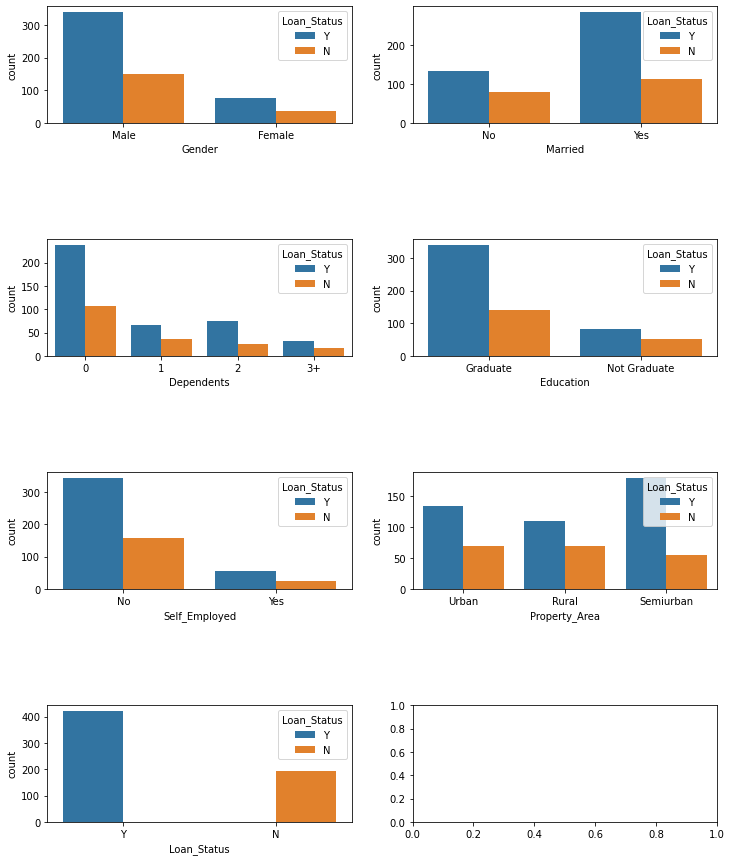

In [11]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_features_train):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

<b>Plots above convey following things about the dataset:</b>
<p>
1)Loan Approval Status: About 2/3rd of applicants have been granted loan.
   <p>
2)Sex: There are more Men than Women (approx. 3x)
       <p>
3)Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
</p><p>
4)Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
</p><p>
5)Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
</p><p>
6)Employment: 5/6th of population is not self employed.
    </p><p>
7)Property Area: More applicants from Semi-urban and also likely to be granted loans.
    </p><p>
8)Applicant with credit history are far more likely to be accepted.
    </p><p>
9)Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).
    </p>

# Feature Engineering

In [12]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
test.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [14]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

# Checking null values

<AxesSubplot:>

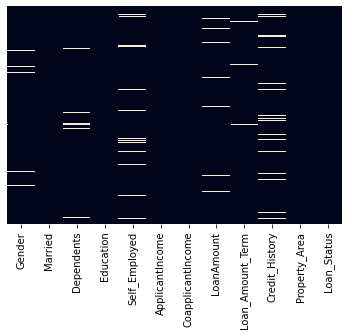

In [16]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [17]:
print("Train Data Categorical Objects")
print()
categorical_features_train = (train.select_dtypes(include=['object']).columns)
for categorical_features_train in train:
    if(train[categorical_features_train].isnull().sum()>0):
        print(categorical_features_train,"=",train[categorical_features_train].isnull().sum())

Train Data Categorical Objects

Gender = 13
Married = 3
Dependents = 15
Self_Employed = 32
LoanAmount = 22
Loan_Amount_Term = 14
Credit_History = 50


In [18]:
print("Test-Data Categorical Objects")
print()
categorical_features_test = (test.select_dtypes(include=['object']).columns)
for categorical_features_test in test:
    if(test[categorical_features_test].isnull().sum()>0):
        print(categorical_features_test,"=",test[categorical_features_test].isnull().sum())

Test-Data Categorical Objects

Gender = 11
Dependents = 10
Self_Employed = 23
LoanAmount = 5
Loan_Amount_Term = 6
Credit_History = 29


In [19]:
#filling all the continuous variables
train.fillna(train.mean(),inplace=True)

In [20]:
#filling all the categorical variables
train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
train['Married']=train['Married'].fillna(train['Married'].mode()[0])
train['Dependents']=train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed']=train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mode()[0])
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0])
train['Credit_History']=train['Credit_History'].fillna(train['Credit_History'].mode()[0])


In [21]:
#test data-set
test.fillna(test.mean(),inplace=True)
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])

In [22]:
print("For Train Data-Set")
print()
for categorical_features_train in train:
    if(train[categorical_features_train].isnull().sum()>0):
        print(categorical_features_train,"=",train[categorical_features_train].isnull().sum())
    else:
        print("No Null Values")
        break

For Train Data-Set

No Null Values


In [23]:
print("For Test Data-Set")
print()
for categorical_features_test in test:
    if(test[categorical_features_test].isnull().sum()>0):
        print(categorical_features_test,"=",test[categorical_features_test].isnull().sum())
    else:
        print("No Null Values")
        break

For Test Data-Set

No Null Values


<AxesSubplot:>

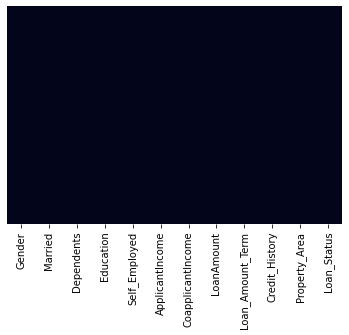

In [24]:
#In the below graph the white colour represent the null values
#we can see that Alley , poolIOC conitans more null vaules
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [25]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Handling Outliers

1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive

{'whiskers': [<matplotlib.lines.Line2D at 0x1788259e088>,
 'caps': [<matplotlib.lines.Line2D at 0x178825bcfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x178825b6f08>],
 'medians': [<matplotlib.lines.Line2D at 0x178825c0b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x178825ca688>],
 'means': []}

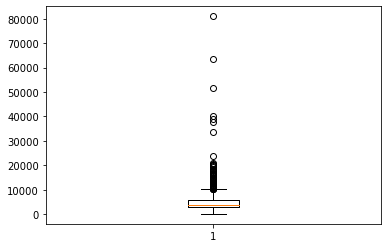

In [26]:
#ApplicantIncome-int64
plt.boxplot(train['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x178822b0a08>,
 'caps': [<matplotlib.lines.Line2D at 0x178822f0888>,
 'boxes': [<matplotlib.lines.Line2D at 0x178823279c8>],
 'medians': [<matplotlib.lines.Line2D at 0x17882355f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1788246df48>],
 'means': []}

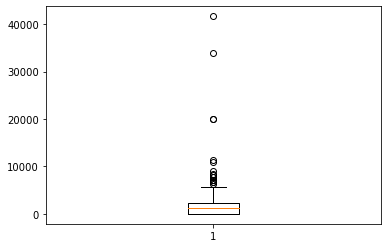

In [27]:
plt.boxplot(train['CoapplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x178826526c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17882672dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x17882672208>],
 'medians': [<matplotlib.lines.Line2D at 0x17882678b88>],
 'fliers': [<matplotlib.lines.Line2D at 0x17882678d88>],
 'means': []}

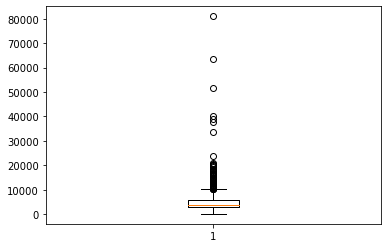

In [28]:
#LoanAmount           float64
plt.boxplot(train['ApplicantIncome'])

## Pairplot

•	Plot pairwise relationships in a dataset. It is also possible to show a subset of variables or plot different variables on the rows and columns.

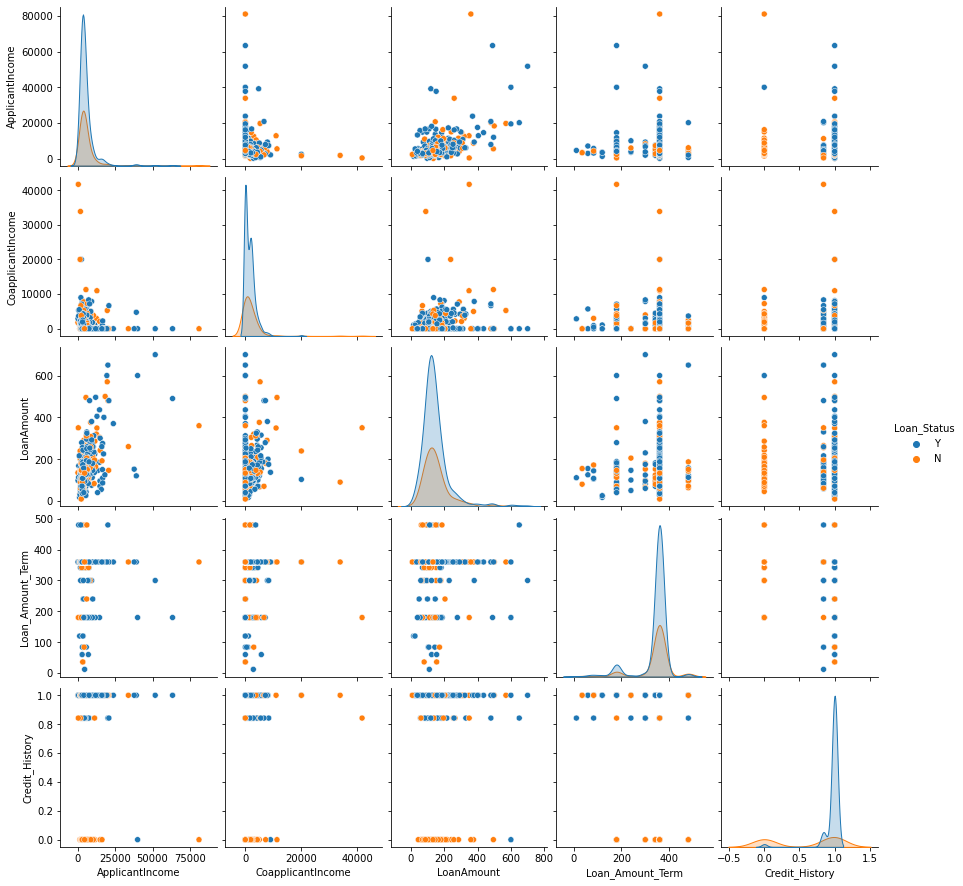

In [29]:
sns.pairplot(train,hue='Loan_Status')

By observing the above graphs we can say that there is a more overlapping betwen the 2 features .. so it's not better to use the logistic regression here it's better to use KNN 

In [30]:
##combining the train and test data-set
train_copy=train.copy()
test_copy=test.copy()
traintest=pd.concat([train,test],axis=0)
traintest.shape

(981, 12)

In [31]:
traintest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Handling Categorical Variables

In [32]:
for i in traintest.select_dtypes(include=['object']).columns:
    print(i,"=",len(traintest[i].unique()))

Gender = 2
Married = 2
Dependents = 4
Education = 2
Self_Employed = 2
Property_Area = 3
Loan_Status = 3


In [33]:
traintest_copy=traintest.copy()
traintest = pd.get_dummies(traintest,drop_first=True)

In [34]:
traintest.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [35]:
traintest.shape

(981, 15)

In [36]:
traintest.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [37]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [38]:
traintest.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Gender_Male                  uint8
Married_Yes                  uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
dtype: object

In [39]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
#Splitting the data set
train=traintest.iloc[:614]
test=traintest.iloc[614:,:]

In [41]:
(train.shape),(test.shape)

((614, 15), (367, 15))

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

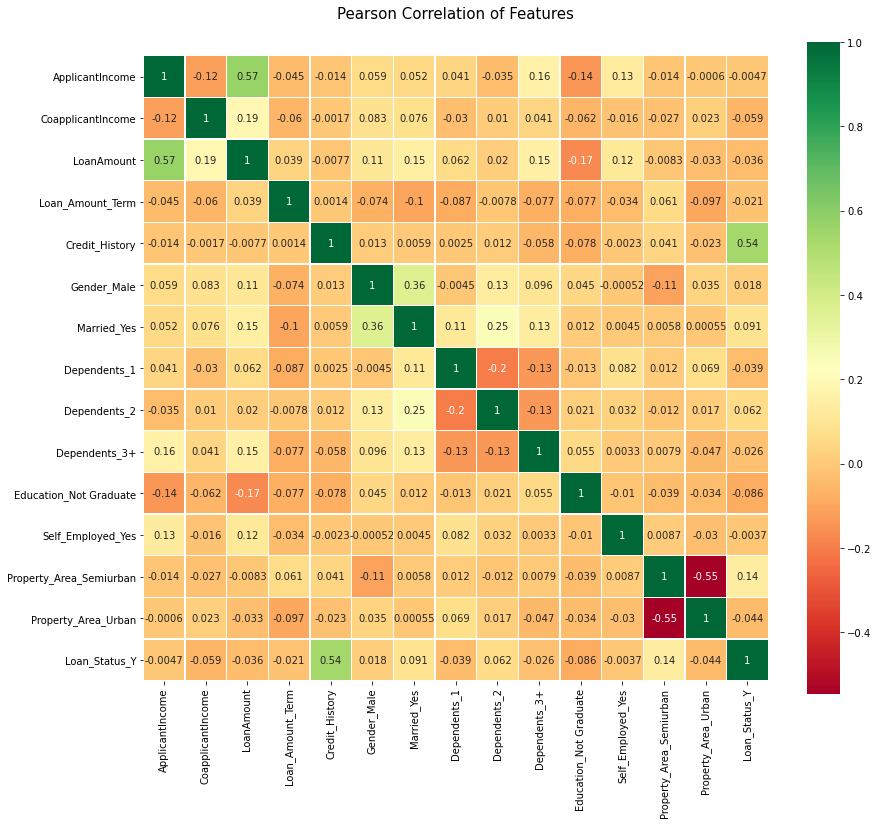

In [42]:
#checking co-realtion
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='RdYlGn', linecolor='white', annot=True)

In [43]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1,1


In [44]:
train.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [45]:
test.drop(['Loan_Status_Y'],axis=1,inplace=True)

In [46]:
X = train.drop(columns='Loan_Status_Y')
y = train['Loan_Status_Y']



# Using CV

In [47]:
from sklearn.model_selection import cross_val_score
def cv(model,cv=10):
    cvx= np.sqrt(cross_val_score(model, X, y, scoring="accuracy", cv=10))
    return(cvx)

## Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
print("Train Accuracy =",cv(log_classifier, cv=10).mean())

Train Accuracy = 0.8921531795435378


In [49]:
log_classifier.fit(X,y)
pred=log_classifier.predict(test)
print("Test Accuracy =",pred.mean())

Test Accuracy = 0.8337874659400545


## K-Nearest Neighbours

In [50]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier(n_neighbors=18)
print("Train Accuracy =",cv(k).mean())

Train Accuracy = 0.8200728048786399


In [51]:
k.fit(X,y)
knn_pred=k.predict(test)
print("Test Accuracy =",knn_pred.mean())

Test Accuracy = 0.9237057220708447


## Decision Trees

In [52]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=0,max_depth=3)
cv(tree_classifier,cv=10).mean()

0.897765640443222

In [53]:
tree_classifier.fit(X,y)
tree_pred=tree_classifier.predict(test)
tree_pred.mean()

0.8283378746594006

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators=40,max_depth=3)
print("Train Accuracy =",cv(random_classifier, cv=10).mean())

Train Accuracy = 0.8986679952802561


In [55]:
random_classifier.fit(X,y)
random_pred=random_classifier.predict(test)
print("Test Accuracy =",random_pred.mean())

Test Accuracy = 0.8392370572207084


[Text(418.5, 475.65000000000003, 'X[12] <= 0.5\ngini = 0.403\nsamples = 375\nvalue = [172, 442]'),
 Text(209.25, 339.75, 'X[3] <= 420.0\ngini = 0.455\nsamples = 243\nvalue = [134, 248]'),
 Text(104.625, 203.85000000000002, 'X[13] <= 0.5\ngini = 0.451\nsamples = 239\nvalue = [129, 247]'),
 Text(52.3125, 67.94999999999999, 'gini = 0.465\nsamples = 110\nvalue = [64, 110]'),
 Text(156.9375, 67.94999999999999, 'gini = 0.436\nsamples = 129\nvalue = [65, 137]'),
 Text(313.875, 203.85000000000002, 'X[1] <= 2567.0\ngini = 0.278\nsamples = 4\nvalue = [5, 1]'),
 Text(261.5625, 67.94999999999999, 'gini = 0.0\nsamples = 3\nvalue = [5, 0]'),
 Text(366.1875, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(627.75, 339.75, 'X[4] <= 0.921\ngini = 0.274\nsamples = 132\nvalue = [38, 194]'),
 Text(523.125, 203.85000000000002, 'X[1] <= 331.5\ngini = 0.467\nsamples = 25\nvalue = [22, 13]'),
 Text(470.8125, 67.94999999999999, 'gini = 0.337\nsamples = 10\nvalue = [11, 3]'),
 Text(575.4375,

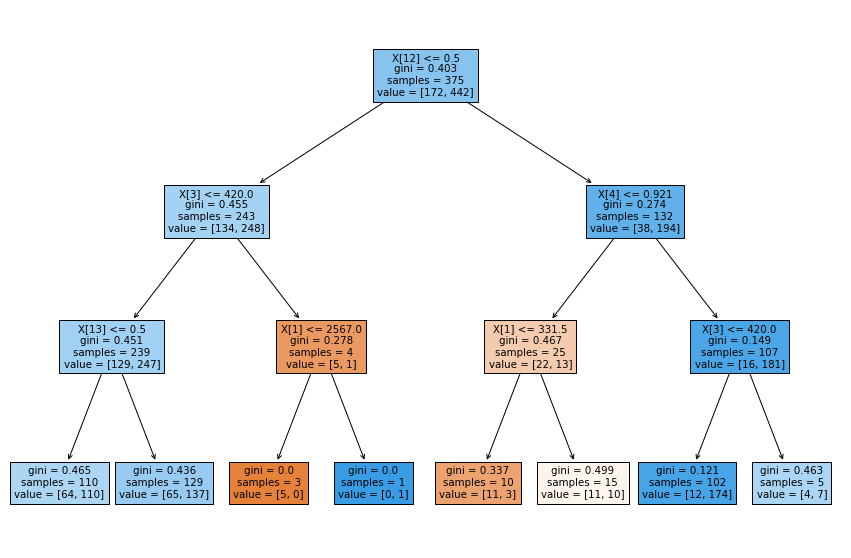

In [56]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(random_classifier.estimators_[10-1],filled=True) 

## SVM

In [57]:
from sklearn.svm import SVC
svm_classifier =SVC()
print("Train Accuracy =",cv(svm_classifier, cv=10).mean())

Train Accuracy = 0.8290343746340472


In [58]:
svm_classifier.fit(X,y)
svm_pred=svm_classifier.predict(test)
print("Test Accuracy =",svm_pred.mean())

Test Accuracy = 1.0


## AdaBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier(learning_rate=0.5)
cv(ada_classifier,cv=10).mean()

0.8940568173117258

In [60]:
ada_classifier.fit(X,y)
ada_pred=ada_classifier.predict(test)
ada_pred.mean()

0.8147138964577657

## Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=50, max_features=2)
cv(gb,cv=10).mean()

0.8931462739836444

In [62]:
gb.fit(X,y)
gb_pred=gb.predict(test)
gb_pred.mean()

0.8310626702997275

# Using Tensorflow

In [63]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd

Using TensorFlow backend.


In [64]:
import tensorflow as tf

In [65]:
train1=pd.read_csv("train.csv")

In [66]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
train1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Handling Categorical Features

In [68]:
from sklearn.preprocessing import LabelEncoder
train1.iloc[:,0] = LabelEncoder().fit_transform(train1.iloc[:,0].astype('str'))
train1.iloc[:,1] = LabelEncoder().fit_transform(train1.iloc[:,1].astype('str'))
train1.iloc[:,2] = LabelEncoder().fit_transform(train1.iloc[:,2].astype('str'))
train1.iloc[:,3] = LabelEncoder().fit_transform(train1.iloc[:,3].astype('str'))
train1.iloc[:,4] = LabelEncoder().fit_transform(train1.iloc[:,4].astype('str'))
train1.iloc[:,5] = LabelEncoder().fit_transform(train1.iloc[:,5].astype('str'))
train1.iloc[:,11] = LabelEncoder().fit_transform(train1.iloc[:,11].astype('str'))
train1.iloc[:,12] = LabelEncoder().fit_transform(train1.iloc[:,12].astype('str'))

In [69]:
train1.shape

(614, 13)

In [70]:
train1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [71]:
train1.shape

(614, 13)

In [72]:
train1.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
import numpy as np
train1['LoanAmount'].replace(np.NaN, train1['LoanAmount'].mean())
train1['Loan_Amount_Term'].replace(np.NaN, train1['Loan_Amount_Term'].mean())

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [74]:
train1= train1.dropna()
train1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [75]:
dataset=train1.values
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
2,3.0,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
3,4.0,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
4,5.0,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,609.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0,1.0
525,610.0,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0,1.0
526,611.0,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0,1.0
527,612.0,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0,1.0


## Scaling Features

In [76]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
pd.DataFrame(X_scale)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.070489,0.000000,0.198860,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.054830,0.036192,0.172214,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.035250,0.000000,0.082489,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.030093,0.056592,0.160637,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.072356,0.000000,0.191027,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.034014,0.000000,0.089725,0.743590,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.048930,0.000000,0.044863,0.358974,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
611,0.097984,0.005760,0.353111,0.743590,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
612,0.091936,0.000000,0.257598,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Splitting Our Data

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [78]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.253766,0.000000,0.198860,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.041707,0.000000,0.104197,0.358974,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.096265,0.000000,0.384949,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.061422,0.034824,0.225760,0.743590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.068237,0.064007,0.247467,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.037304,0.049536,0.137482,0.743590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
425,0.023055,0.046296,0.094067,0.743590,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
426,0.020656,0.042456,0.124457,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
427,0.056710,0.000000,0.186686,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [79]:
x_val, X_test, y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [80]:
print(X_train.shape, X_test.shape, x_val.shape, Y_train.shape, Y_test.shape, y_val.shape)

(429, 14) (93, 14) (92, 14) (429,) (93,) (92,)


In [81]:
#the word dense is used to define a layer of connected neurons here we use 3 layers and input_shape refers the number of
#inputs we are using


model = Sequential([
    Dense(32, activation='relu', input_shape=(14,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [82]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [83]:
hist=model.fit(X_train,Y_train, 
          batch_size = 32, epochs = 100,
        validation_data = (x_val,y_val))

Train on 429 samples, validate on 92 samples
Epoch 1/100
429/429 [==============================] - 0s 579us/step - loss: 0.7406 - accuracy: 0.3263 - val_loss: 0.7219 - val_accuracy: 0.3696
Epoch 2/100
429/429 [==============================] - 0s 78us/step - loss: 0.6994 - accuracy: 0.4755 - val_loss: 0.6837 - val_accuracy: 0.5109
Epoch 3/100
429/429 [==============================] - 0s 76us/step - loss: 0.6691 - accuracy: 0.6760 - val_loss: 0.6581 - val_accuracy: 0.7174
Epoch 4/100
429/429 [==============================] - 0s 82us/step - loss: 0.6493 - accuracy: 0.6830 - val_loss: 0.6404 - val_accuracy: 0.6848
Epoch 5/100
429/429 [==============================] - 0s 77us/step - loss: 0.6354 - accuracy: 0.6807 - val_loss: 0.6272 - val_accuracy: 0.6848
Epoch 6/100
429/429 [==============================] - 0s 79us/step - loss: 0.6251 - accuracy: 0.6783 - val_loss: 0.6180 - val_accuracy: 0.6739
Epoch 7/100
429/429 [==============================] - 0s 79us/step - loss: 0.6181 - accur

In [86]:
model.evaluate(X_test,Y_test)[1]